# Bay Wheels System Dataset
## by Bindushree

## Preliminary Wrangling

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.Their eye-catching bikes are durable, easy to use, and built to fit everyone.The Classic bicycles were designed for easy riding in an urban environment. They were built to be comfortable for any type of rider, regardless of height, or riding ability. This first-of-its-kind hybrid ebike allows you to dock at any Bay Wheels stations or use the cable to lock to any bike rack within the service area. With miles of service area and nearly 400 stations, Bay Wheels gets you where you’re going. 

## Overview of the dataset

The dataset I have used here is the 2017 trip data for the exploratory analysis. It consists of about 519k rows and 13 columns.

Analysis and findings.
1. When are most trips taken in terms of time of day, day of the week, or month of the year?
2. How long does the average trip take?
3. Does the above depend on if a user is a subscriber or customer?

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

In [59]:
# Load the dataset
df = pd.read_csv("2017-fordgobike-tripdata.csv")
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
428854,911,2017-08-18 14:44:55.8350,2017-08-18 15:00:07.0080,40,Laguna St at McAllister St,37.779208,-122.426829,29,O'Farrell St at Divisadero St,37.782405,-122.439446,917,Customer
381941,819,2017-09-04 12:49:36.0240,2017-09-04 13:03:15.9820,89,Division St at Potrero Ave,37.769218,-122.407646,81,Berry St at 4th St,37.775880,-122.393170,1735,Customer
155128,468,2017-11-08 12:10:27.4970,2017-11-08 12:18:15.9880,279,Santa Clara St at 7th St,37.339146,-121.884105,304,Jackson St at 5th St,37.348759,-121.894798,2779,Subscriber
419549,314,2017-08-22 09:52:45.6220,2017-08-22 09:58:00.3270,211,Broadway at 40th St,37.827757,-122.256716,176,MacArthur BART Station,37.828410,-122.266315,643,Subscriber
145314,2187,2017-11-10 20:18:46.9900,2017-11-10 20:55:14.7180,304,Jackson St at 5th St,37.348759,-121.894798,308,San Pedro Square,37.336802,-121.894090,1845,Customer


In [3]:
df.shape

(519700, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [5]:
# check for null entries in the dataset
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

In [6]:
# check for duplicated entries in the dataset
sum(df.duplicated())

0

In [7]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000


In [8]:
df['start_station_id'].value_counts(ascending = False).head(10)

15    15187
6     13664
30    12546
67    12055
58    11960
21    11334
81    10956
3     10142
22     9926
16     9347
Name: start_station_id, dtype: int64

In [9]:
df['end_station_id'].value_counts(ascending = False).head(10)

30    17378
15    17109
6     16531
67    13658
21    13443
58    11298
3     11064
81    10611
16     9321
5      8563
Name: end_station_id, dtype: int64

In [10]:
df['user_type'].value_counts()

Subscriber    409230
Customer      110470
Name: user_type, dtype: int64

In [11]:
df['bike_id'].value_counts(ascending = False).head(10)

68      457
2178    426
210     408
813     403
602     402
775     399
256     396
796     396
395     396
190     395
Name: bike_id, dtype: int64

# What is the structure of your dataset?
This dataset consists of 519700 rows and 13 columns. It doesn't have null values.
Qualiry and tidiness issues should be resolved

### What is/are the main feature(s) of interest in your dataset?
1. When are most trips taken in terms of time of day, day of the week, or month of the year?
2. How long does the average trip take?
3. Does the above depend on if a user is a subscriber or customer?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
The columns that would support me are trip duration and the time related columns

### Cleaning the data

In [60]:
df_clean = df.copy()

### The datatypes of start_time, end_time and user_type columns are incorrect

In [61]:
# Change the datatypes of start and end time to datetime datatype
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

# Change the dataype of user_type column to category datatype
df_clean['user_type'] = df_clean['user_type'].astype('category')

In [62]:
# Check for the changed made to the respective columns
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  int64         
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  int64         
 12  user_type       

### Split the start_time and end_time to day, month and week format

In [63]:
df_clean['start_day'] = pd.to_datetime(df_clean['start_time']).dt.day
df_clean['start_week'] = pd.to_datetime(df_clean['start_time']).dt.dayofweek
df_clean['start_month'] = pd.to_datetime(df_clean['start_time'], format = '%m').dt.month_name()

In [64]:
df_clean['hour'] = pd.to_datetime(df_clean['start_time']).dt.hour
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,start_day,start_week,start_month,hour
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,31,6,December,16
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,31,6,December,15
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,31,6,December,22
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,31,6,December,17
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,31,6,December,14


In [65]:
df_clean['start_day'] = pd.to_datetime(df_clean['start_time']).dt.day
df_clean['start_week'] = pd.to_datetime(df_clean['start_time']).dt.dayofweek
df_clean['start_month'] = pd.to_datetime(df_clean['start_time'], format = '%m').dt.month_name()

In [66]:
# change the day of the week number to the name of the week
days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df_clean['start_week'] = df_clean['start_week'].apply(lambda x: days[x])

In [67]:
df_clean['end_day'] = pd.to_datetime(df_clean['end_time']).dt.day
df_clean['end_week'] = pd.to_datetime(df_clean['end_time']).dt.dayofweek
df_clean['end_month'] = pd.to_datetime(df_clean['end_time'], format = '%m').dt.month_name()

In [68]:
# change the day of the week number to the name of the week
days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df_clean['end_week'] = df_clean['end_week'].apply(lambda x: days[x])

In [69]:
print('start_week:', df_clean['start_week'].unique())
print('end_week:', df_clean['end_week'].unique())

start_week: ['Sunday' 'Saturday' 'Friday' 'Thursday' 'Wednesday' 'Tuesday' 'Monday']
end_week: ['Monday' 'Sunday' 'Saturday' 'Friday' 'Thursday' 'Wednesday' 'Tuesday']


In [70]:
order_week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ordered = pd.api.types.CategoricalDtype(ordered= True, categories = order_week)
df_clean['start_week'] = df_clean['start_week'].astype(ordered)

In [71]:
order_week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ordered = pd.api.types.CategoricalDtype(ordered= True, categories = order_week)
df_clean['end_week'] = df_clean['end_week'].astype(ordered)

In [74]:
df_clean['start_month'] = df_clean['start_month'].astype('category')
df_clean['end_month'] = df_clean['end_month'].astype('category')

In [75]:
# Check for the changes made
df_clean.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,start_day,start_week,start_month,hour,end_day,end_week,end_month
230297,225,2017-10-18 15:37:00.623,2017-10-18 15:40:46.098,90,Townsend St at 7th St,37.771058,-122.402717,80,Townsend St at 5th St,37.775306,-122.397380,2580,Subscriber,18,Wednesday,October,15,18,Wednesday,October
35924,191,2017-12-15 07:59:46.272,2017-12-15 08:02:57.860,127,Valencia St at 21st St,37.756708,-122.421025,141,Valencia St at Cesar Chavez St,37.747998,-122.420219,3226,Subscriber,15,Friday,December,7,15,Friday,December
80263,1487,2017-12-03 05:58:18.109,2017-12-03 06:23:06.065,64,5th St at Brannan St,37.776754,-122.399018,66,3rd St at Townsend St,37.778742,-122.392741,525,Subscriber,3,Sunday,December,5,3,Sunday,December
388066,653,2017-09-01 14:26:23.038,2017-09-01 14:37:16.552,58,Market St at 10th St,37.776619,-122.417385,121,Mission Playground,37.759210,-122.421339,2028,Subscriber,1,Friday,September,14,1,Friday,September
67173,784,2017-12-06 16:59:23.343,2017-12-06 17:12:27.668,79,7th St at Brannan St,37.773492,-122.403673,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,2670,Subscriber,6,Wednesday,December,16,6,Wednesday,December


In [76]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  int64         
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  int64         
 12  user_type       

## Univariate Exploration

In [25]:
# Proportion of the type of users in the Bay Wheels
user = df_clean['user_type'].value_counts()/df_clean.count()[0]
user

Subscriber    0.787435
Customer      0.212565
Name: user_type, dtype: float64

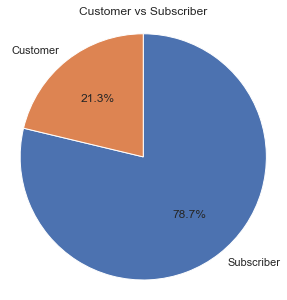

In [27]:
# Visualize the user type column
sb.set(rc={'figure.figsize':(14,5)})
plt.pie(user,labels=user.index, startangle=90, counterclock=False, autopct='%1.1f%%');
plt.axis('square')
plt.title('Customer vs Subscriber');

We see that more than a quarter of users are subscribers as compared to the customers. May be subscribers have more advantages or discounts or flexibilty for the rides and people prefer to be the subscribers for the Bay Wheels.

In [28]:
# Proportion of users during the days of the week
week_counts = df_clean['start_week'].value_counts()
week_order = week_counts.index
n_df_clean = df_clean.shape[0]
max_week_order = week_counts[0]
print('max_week_order:', max_week_order)
max_prop = max_week_order/n_df_clean
print('max_prop:', max_prop)

max_week_order: 81410
max_prop: 0.15664806619203386


In [29]:
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14']

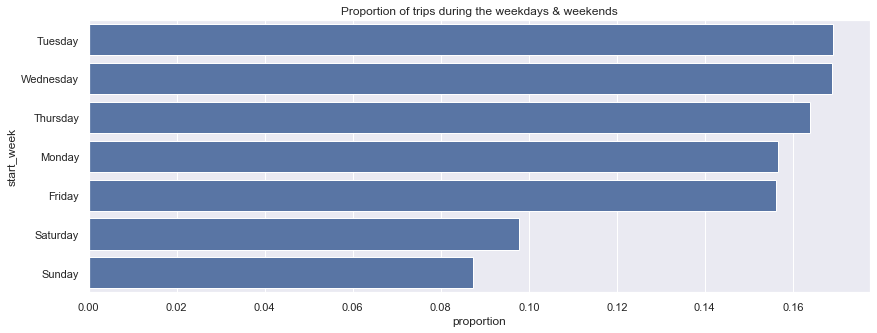

In [82]:
# Visualize the number of rides on the days of the week
base_color = sb.color_palette()[0]
week_order = df_clean['start_week'].value_counts().index
sb.countplot(data = df_clean, y = 'start_week', color = base_color, order = week_order)
plt.xticks(tick_props * n_df_clean, tick_names)
plt.xlabel('proportion')
plt.title('Proportion of trips during the weekdays & weekends');

We see that the trips on Tuesdays, Wednesdays are the highest with more than 16%, followed by Thursdays and the least number of trips is on Sunday with less than .9%. We can notice that most of the users are using the bikes for weekday transportation that is more affordable, quick and accessible compared to the trips on weekends where users might mainly use it for leisure time.

In [77]:
# Proportion of users in different months
month_counts = df_clean['start_month'].value_counts()
month_order = month_counts.index
n_df_clean = df_clean.shape[0]
max_month_order = month_counts[0]
print('max_month_order:', max_month_order)
max_prop = max_month_order/n_df_clean
print('max_prop:', max_prop)

max_month_order: 83292
max_prop: 0.16026938618433711


In [78]:
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14', '0.16']

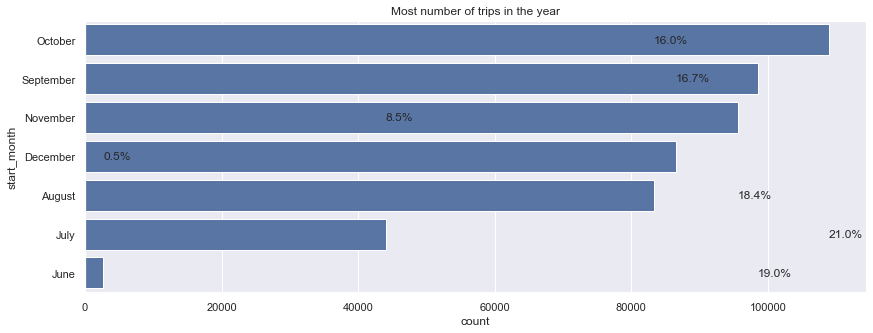

In [83]:
# Lets see in which months were the most trips taken by the users
base_color = sb.color_palette()[0]
month_order = df_clean['start_month'].value_counts().index
sb.countplot(data = df_clean, y = 'start_month', color = base_color, order = month_order)
plt.title('Most number of trips in the year')

for i in range(month_counts.shape[0]):
    count = month_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_df_clean)
    plt.text(count + 1, i, pct_string, va = 'center')

We see that the highest number of trips was in the month of october with 21%, followed by September with 19%.
The least number of rides was in June with .5%

In [34]:
# Lets see in which hour of the day was the most number of trips
df_clean['hour'].value_counts().head(10)

17    60111
8     57227
18    46088
9     45457
16    41339
15    28448
12    27448
13    27374
7     26800
19    26598
Name: hour, dtype: int64

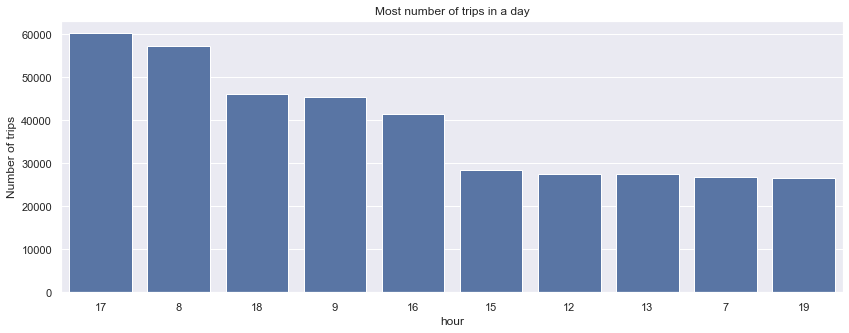

In [35]:
hour_counts = df_clean['hour'].value_counts().head(10)
hour_order = hour_counts.index
sb.countplot(data = df_clean, x = 'hour', color = base_color, order = hour_order)
plt.xlabel('hour')
plt.ylabel('Number of trips')
plt.title('Most number of trips in a day');

We see that most of the trips are in the early morning at 8 hr followed by 9 hr and in the evenings at 17 hr and followed by 18 hr.We can say that the users are using the bikes for everyday transportation purposes during these hours of the day.

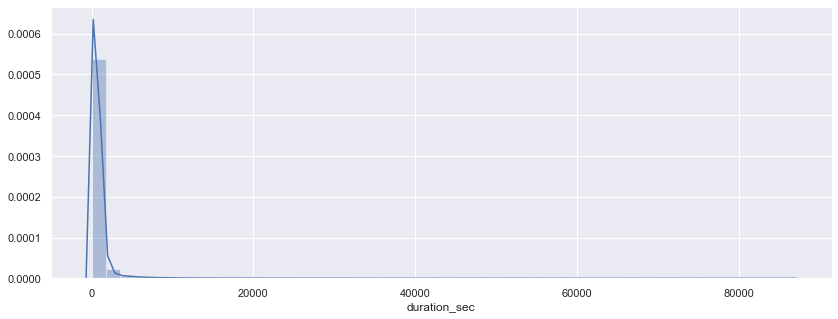

In [36]:
# Lets visualize the time duration for the trips
sb.distplot(df_clean['duration_sec']);

The duration data is too much skewed and unable to visualize the values. Lets change the bin values and check

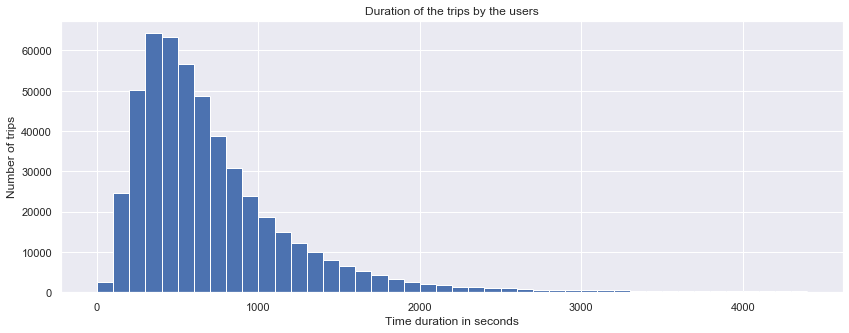

In [37]:
bins = np.arange(0, 4500, 100)
plt.hist(data=df_clean, x='duration_sec', bins=bins)
plt.xlabel('Time duration in seconds')
plt.ylabel('Number of trips')
plt.title('Duration of the trips by the users');

We see that the users maximum duration for the rides is around 6 minutes and the minimum duration is about 1 hour

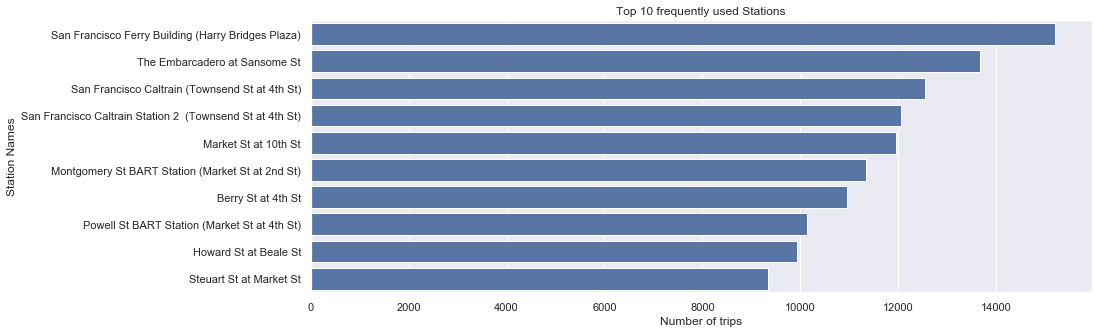

In [38]:
# Frequently used Start Stations for the ride
station_name = df_clean['start_station_name'].value_counts().head(10)
station_order = station_name.index
sb.countplot(data = df_clean, y = 'start_station_name', color = base_color, order = station_order)
plt.xlabel('Number of trips')
plt.ylabel('Station Names')
plt.title('Top 10 frequently used Stations');

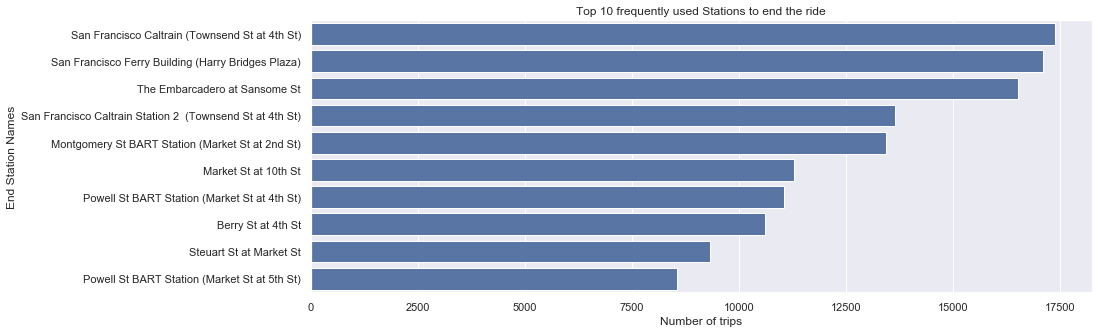

In [39]:
# Frequently used Stations to end the ride
station_name_end = df_clean['end_station_name'].value_counts().head(10)
station_order_end = station_name_end.index
sb.countplot(data = df_clean, y = 'end_station_name', color = base_color, order = station_order_end)
plt.xlabel('Number of trips')
plt.ylabel('End Station Names')
plt.title('Top 10 frequently used Stations to end the ride');

In [80]:
# save the clean data to a .csv file
df_clean.to_csv('df_clean_final.csv', index=False)

## Bivariate Exploration

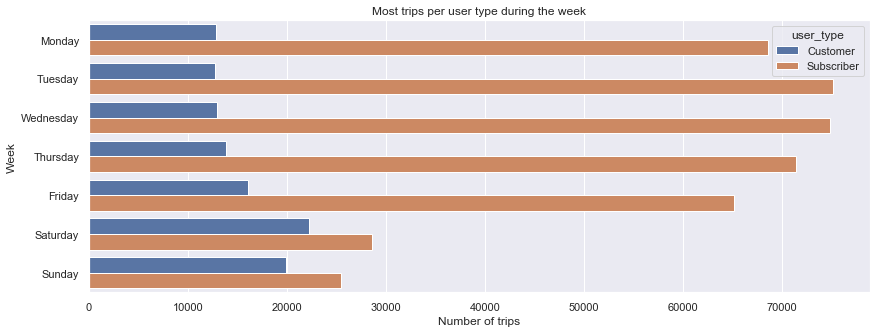

In [84]:
# On which days and which type of user had the most rides
sb.countplot(data = df_clean, y='start_week', hue = 'user_type')
plt.xlabel('Number of trips')
plt.ylabel('Week')
plt.title('Most trips per user type during the week');

1. We see that the subscriber users have most number of rides on the weekdays which implies that they are frequent riders during the weekdays where they have the advantages like discounts or flexibility which is more affordable on a daily basis.
2. The Customer users have the most rides on the weekends, which implies that they might use the vehicle for their leisure time.

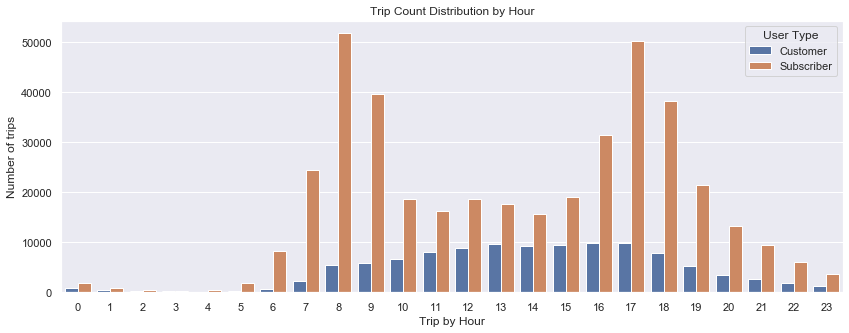

In [41]:
sb.countplot(data=df_clean, x='hour', hue='user_type')
plt.xlabel('Trip by Hour')
plt.ylabel('Number of trips')
plt.title('Trip Count Distribution by Hour')
plt.legend(title='User Type');

Wee see that highest number of trips are by subscribers and are most frequent during the morning between 8hr and 9 hr and in the evening between 17hr and 18hr.
The trips by Customers is mostly between the afternoon and evening.

In [42]:
#Create sub-datasets for subscribers and customers
subs = df_clean.query('user_type == "Subscriber"')
cust = df_clean.query('user_type == "Customer"')

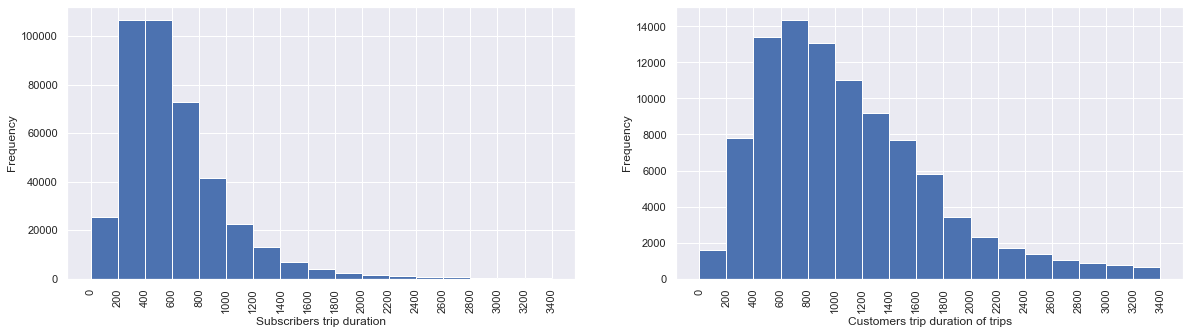

In [43]:
#Set the bin size
bins = np.arange(0, 3500, 200)
ticks = list(range(0, 3501, 200))
plt.figure(figsize=[20,5])

#Subplot 1: Subscribers
plt.subplot(1,2,1)
plt.hist(data = subs, x = 'duration_sec', bins = bins)
plt.xlabel('Subscribers trip duration')
plt.xticks(ticks, rotation = 90)
plt.ylabel('Frequency')

#Subplot 2: Customers
plt.subplot(1,2,2)
plt.hist(data = cust, x = 'duration_sec', bins = bins)
plt.xlabel('Customers trip duration of trips')
plt.ylabel('Frequency')
plt.xticks(ticks, rotation = 90);


We see that even though there are more number of subscribes, the ride duration for the customers is more(between 10 minutes to 15 minutes) as compared to the subscribers.

## Multivariate Exploration

In [44]:
df_clean.groupby(['start_week', 'user_type'])['duration_sec'].count()

start_week  user_type 
Monday      Customer      12806
            Subscriber    68604
Tuesday     Customer      12737
            Subscriber    75128
Wednesday   Customer      12928
            Subscriber    74824
Thursday    Customer      13823
            Subscriber    71420
Friday      Customer      16050
            Subscriber    65115
Saturday    Customer      22225
            Subscriber    28649
Sunday      Customer      19901
            Subscriber    25490
Name: duration_sec, dtype: int64

In [45]:
# Lets take a bunch of data for easy visualizations. I have considered the trip duration less than or equal to around 16 minutes 
duration_1000 = df_clean.loc[df['duration_sec'] <= 1000]

C:\Users\Bindushree\anaconda3\envs\test_env\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


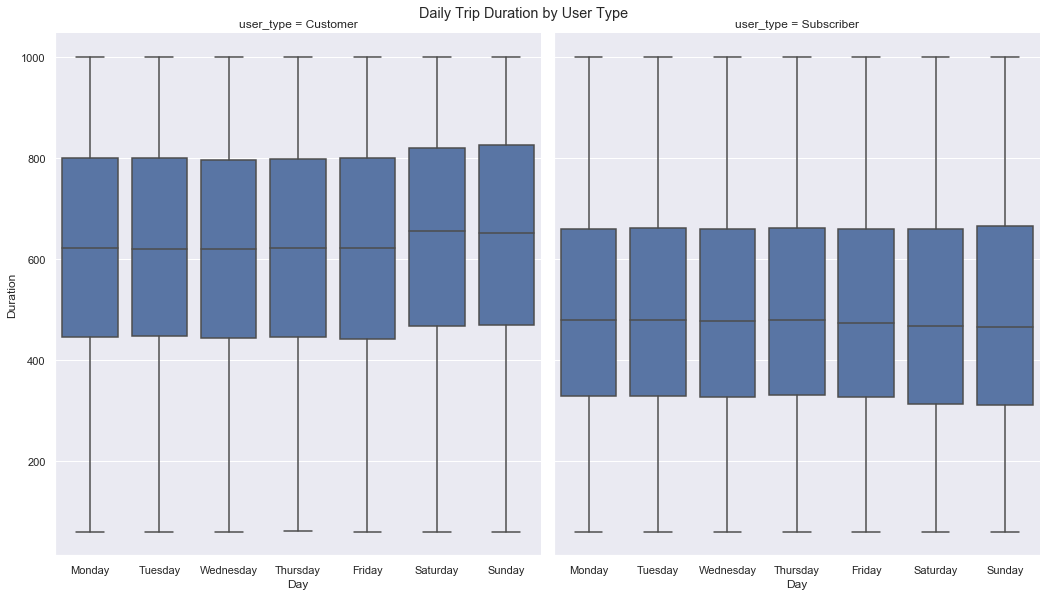

In [46]:
g = sb.FacetGrid(data = duration_1000, col = 'user_type', height = 8.27, aspect = (14.70/2)/8.27)
g.map(sb.boxplot, 'start_week', 'duration_sec');
plt.suptitle("Daily Trip Duration by User Type", y = 1)
g.set_axis_labels('Day', 'Duration');

1. From all the above visualizations we can conclude that being a subscriber for the Bay Wheels is more advantages compared to being a customer. There might be discounts, flexibility and also they are affordable if the subscription is made for frequent travel.
2. We see that the subscribers mostly use the bikes on weekdays for transporation purpose that is quiet quick to travel, whereas the customers use the bikes on weekends for their leisure or free time and also they have the bikes for a longer duration as compared to the subscribers.
3. The most frequent travel by subscribers is between 8 and 9 hr in the morning and between 17 and 18hr in the evening which implies that most of them use the bikes for mobility on a daily basis which os easy to travel.
4. The most frequent travel time for customers is mostly between the afternoon and evenings.
5. So finally we can say that subscribers and the customers have two different behaviours.